# Net Worth

## Total

In [27]:
# Net worth (mlns.)

# Input your bank account values
savings_tot = 0.110842 + 0.024000 + 0.000506 # Current/Saving account values
portfolio_tot = 0.02178088 # Stocks and Shares ISA value. 

tangible_assets = {'Ford Ranger': 0.011000}

tangible_assets_tot = 0
for asset, value in tangible_assets.items(): 
    tangible_assets_tot += value

net_worth = savings_tot + portfolio_tot + tangible_assets_tot
print(net_worth) # Copy cell output to next cell (net worth by date storage).

0.16812888


## Net Worth By Date

In [28]:
# "First pandas cell". Must be re-run later.

import pandas as pd

# Create DataFrame
net_worth_by_date = pd.DataFrame(columns=['Date', 'Net Worth'])
# Input our data
net_worth_by_date.loc[len(net_worth_by_date.index)] = ["2024-07-31", 0.16812888]
net_worth_by_date.loc[len(net_worth_by_date.index)] = ["2024-08-08", 0.18855555]
net_worth_by_date.loc[len(net_worth_by_date.index)] = ["2024-11-01", 0.19984444]
net_worth_by_date.loc[len(net_worth_by_date.index)] = ["2024-11-05", 0.19984000]
net_worth_by_date.loc[len(net_worth_by_date.index)] = ["2024-12-01", 0.19999999]
net_worth_by_date.loc[len(net_worth_by_date.index)] = ["2025-01-01", 0.30]

net_worth_by_date.head()

,Date,Net Worth
0,2024-07-31,0.168129
1,2024-08-08,0.188556
2,2024-11-01,0.199844
3,2024-11-05,0.199840
4,2024-12-01,0.200000


In [29]:
# Add trend since last cell column
net_worth_by_date["Trend Compared to Previous Input"] = net_worth_by_date["Net Worth"] - net_worth_by_date["Net Worth"].shift()

net_worth_by_date.head()

,Date,Net Worth,Trend Compared to Previous Input
0,2024-07-31,0.168129,NaN
1,2024-08-08,0.188556,0.020427
2,2024-11-01,0.199844,0.011289
3,2024-11-05,0.199840,-0.000004
4,2024-12-01,0.200000,0.000160


### Plot 

<Axes: xlabel='Date'>

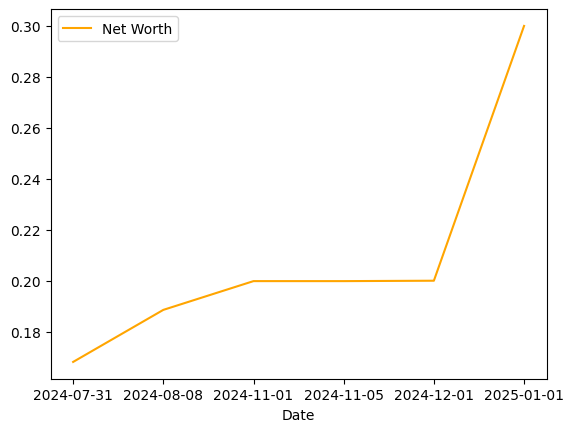

In [30]:
net_worth_by_date.plot(x='Date', y='Net Worth', kind='line', color='orange')

### Plot (Quarterly)
Plot latest figure in each quarter.

_(Requires first pandas cell to be re-run for some reason.)_

     Date  Net Worth  Trend Compared to Previous Input
0  2024Q3   0.168129                               NaN
1  2024Q3   0.188556                          0.020427
2  2024Q4   0.199844                          0.011289
3  2024Q4   0.199840                         -0.000004
4  2024Q4   0.200000                          0.000160


<Axes: xlabel='Date'>

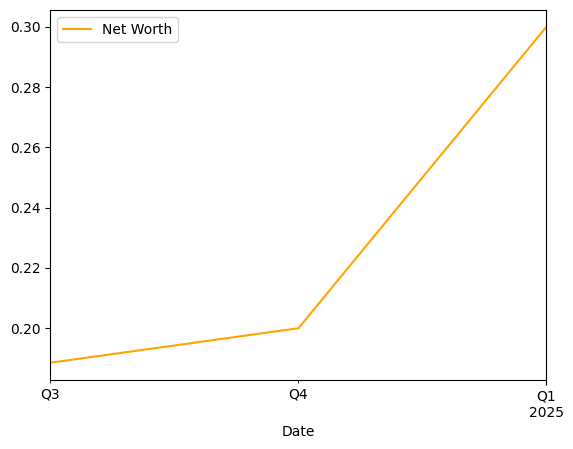

In [31]:
net_worth_by_date_quarters = net_worth_by_date.copy()
#.drop("Trend Compared to Previous Input")

# Changes dates to datetime
net_worth_by_date_quarters['Date'] = pd.to_datetime(net_worth_by_date_quarters['Date'])

# Change date values to quarter value
net_worth_by_date_quarters['Date'] = net_worth_by_date_quarters['Date'].dt.to_period('Q')

print(net_worth_by_date_quarters.head())

# DataFrame = DataFrame with duplicate values removed; keep latest value for end of quarter result
net_worth_by_date_quarters = net_worth_by_date_quarters.drop_duplicates(subset=['Date'], keep='last')

# Plot
net_worth_by_date_quarters.plot(x='Date', y='Net Worth', kind='line', color='orange')

# Plots (with Target)

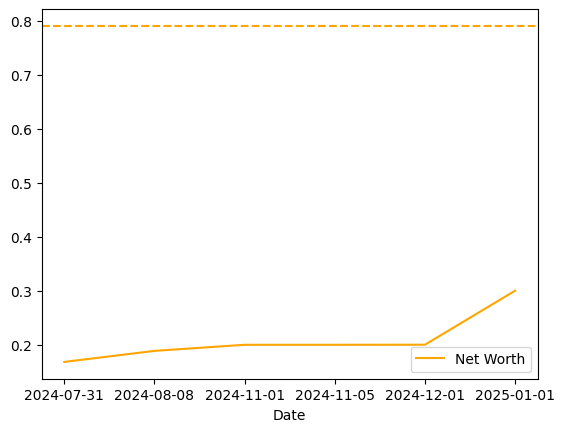

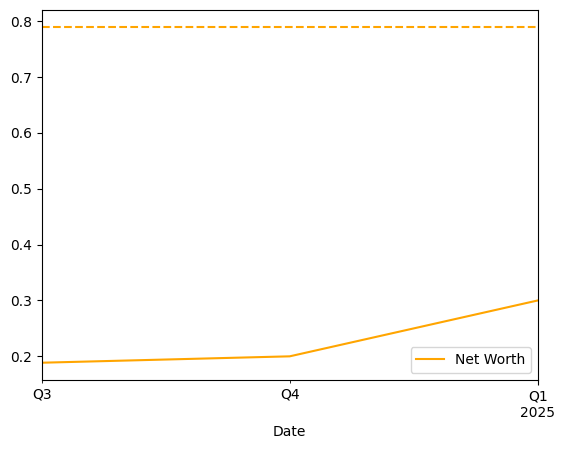

In [32]:
# Set this
target = 0.79 # (mlns.)

ax = net_worth_by_date.plot(x='Date', y='Net Worth', kind='line', color='orange')
ax.axhline(y=target, color='orange', linestyle='--') # Add target line

ax = net_worth_by_date_quarters.plot(x='Date', y='Net Worth', kind='line', color='orange')
ax.axhline(y=target, color='orange', linestyle='--') # Add target line
